In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv("./../data/train_derived.csv")

In [3]:
len(df)

6362620

In [15]:
df.loc[df["isFraud"] == 1, "amount"].sum()

12056415427.839998

In [16]:
df.loc[df["isFraud"] == 1].groupby("type")["amount"].sum()

type
CASH_OUT    5.989202e+09
TRANSFER    6.067213e+09
Name: amount, dtype: float64

In [18]:
5989202000 + (0.6*6067213000)

9629529800.0

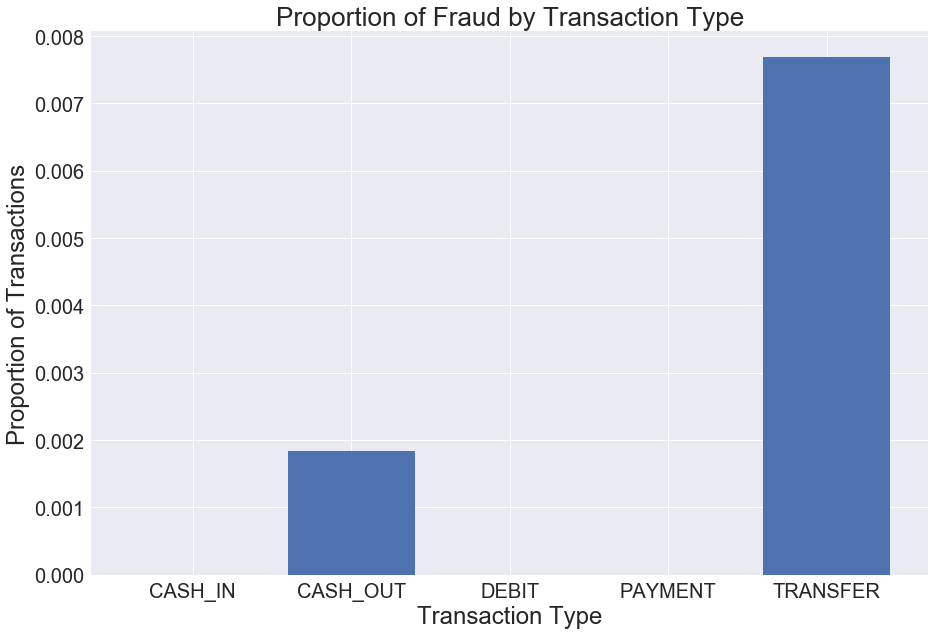

In [3]:
plot_df = pd.DataFrame(df.groupby("type")["isFraud"].mean())

plt.figure(figsize=(15,10))
plt.bar(plot_df.index, plot_df["isFraud"])
plt.title("Proportion of Fraud by Transaction Type", fontsize=26)
plt.xlabel("Transaction Type", fontsize=24)
plt.xticks(fontsize=20)
plt.ylabel("Proportion of Transactions", fontsize=24)
plt.yticks(fontsize=20)
plt.savefig("./../figures/type_bar.png", dpi=600)

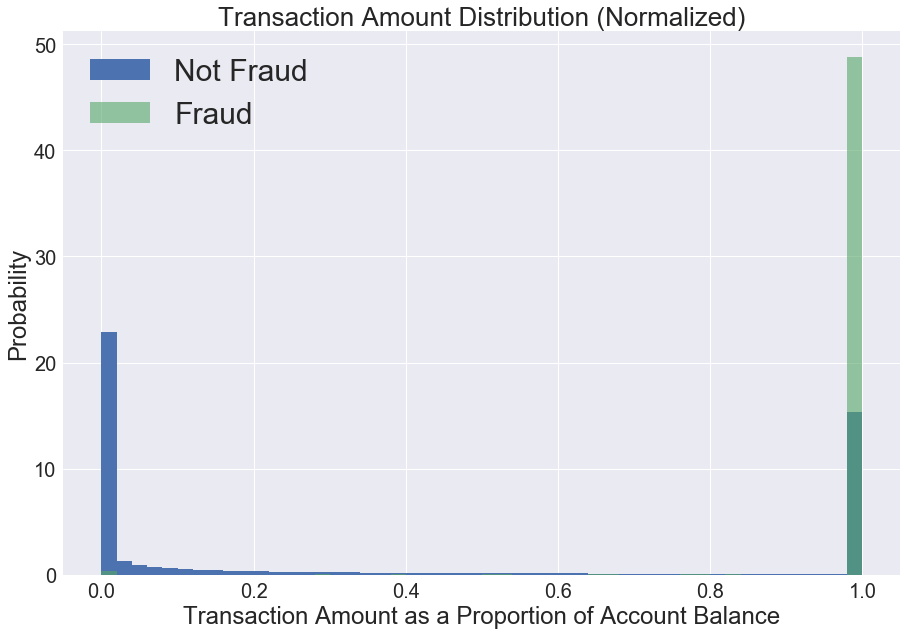

In [5]:
plot_df = df.loc[df["orig_balance_change"] <= 0]

plt.figure(figsize=(15,10))
plt.hist(-plot_df.loc[plot_df["isFraud"] == 0, "orig_balance_change"], bins = 50, density = True, label = "Not Fraud")
plt.hist(-plot_df.loc[plot_df["isFraud"] == 1, "orig_balance_change"], bins = 50, density = True, label = "Fraud", alpha = 0.6)
plt.title("Transaction Amount Distribution (Normalized)", fontsize = 26)
plt.xlabel("Transaction Amount as a Proportion of Account Balance", fontsize = 24)
plt.xticks(fontsize = 20)
plt.ylabel("Probability", fontsize = 24)
plt.yticks(fontsize = 20)
plt.legend(prop = {"size": 30})
plt.savefig("./../figures/orig_trans_amount_dist.png", dpi = 600)

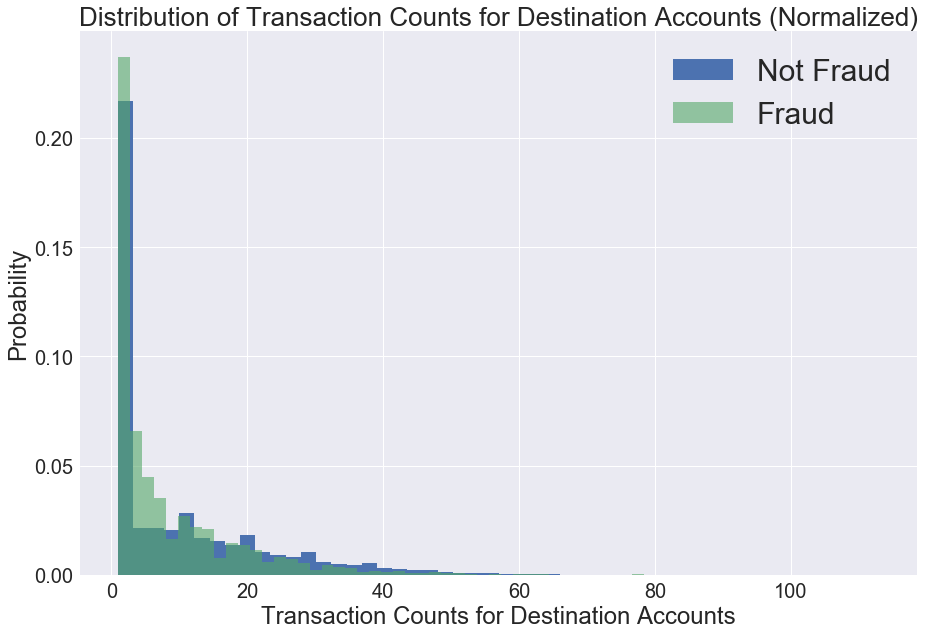

In [12]:
plot_df = df.loc[df["orig_balance_change"] <= 0]

plt.figure(figsize=(15,10))
plt.hist(plot_df.loc[plot_df["isFraud"] == 0, "to_node_weights"], bins = 50, density = True, label = "Not Fraud")
plt.hist(plot_df.loc[plot_df["isFraud"] == 1, "to_node_weights"], bins = 50, density = True, label = "Fraud", alpha = 0.6)
plt.title("Distribution of Transaction Counts for Destination Accounts (Normalized)", fontsize = 26)
plt.xlabel("Transaction Counts for Destination Accounts", fontsize = 24)
plt.xticks(fontsize = 20)
plt.ylabel("Probability", fontsize = 24)
plt.yticks(fontsize = 20)
plt.legend(prop = {"size": 30})
plt.savefig("./../figures/dest_trans_counts_dist.png", dpi = 600)